# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Dependencies
import json
import requests

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = base_url + 'appid=' + api_key +'&units=' + units + '&q='


# Create lists for appending data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


#create counters
record_count = 1
set_count = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        city_name.append(weather_response["name"])
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response["main"]["humidity"])
        max_temp.append(weather_response["main"]["temp_max"])
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        wind_speed.append(weather_response["wind"]["speed"])
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
        #add to counters
        record_count += 1
        if record_count == 50:
            set_count += 1
            record_count = 1
            
        
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | pisco
Processing Record 2 of Set 1 | bulgan
Processing Record 3 of Set 1 | auki
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | buin
Processing Record 8 of Set 1 | imeni babushkina
Processing Record 9 of Set 1 | luoyang
Processing Record 10 of Set 1 | guerrero negro
Processing Record 11 of Set 1 | fortuna
City not found. Skipping...
Processing Record 12 of Set 1 | esperance
City not found. Skipping...
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | marzuq
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | metro
Processing Record 21 of Set 1 | matay
Processing Record 22 of Set 1 | aksu
Proce

Processing Record 39 of Set 4 | shaunavon
Processing Record 40 of Set 4 | zhoucheng
City not found. Skipping...
Processing Record 41 of Set 4 | huntingdon
Processing Record 42 of Set 4 | dunedin
Processing Record 43 of Set 4 | ketchikan
Processing Record 44 of Set 4 | new norfolk
Processing Record 45 of Set 4 | carnarvon
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 46 of Set 4 | tarakan
Processing Record 47 of Set 4 | cidreira
City not found. Skipping...
Processing Record 48 of Set 4 | larsnes
Processing Record 49 of Set 4 | nanakuli
Processing Record 1 of Set 5 | tual
Processing Record 2 of Set 5 | kaeo
Processing Record 3 of Set 5 | luanda
Processing Record 4 of Set 5 | zhigansk
Processing Record 5 of Set 5 | piacabucu
Processing Record 6 of Set 5 | quang ngai
Processing Record 7 of Set 5 | longyearbyen
Processing Record 8 of Set 5 | boa vista
Processing Record 9 of Set 5 | panorama
Processing Record 10 of Set 5 | mao
Processin

Processing Record 22 of Set 8 | paamiut
Processing Record 23 of Set 8 | aksarka
City not found. Skipping...
Processing Record 24 of Set 8 | portland
Processing Record 25 of Set 8 | chake chake
Processing Record 26 of Set 8 | mackenzie
Processing Record 27 of Set 8 | saint-pierre
Processing Record 28 of Set 8 | sabha
Processing Record 29 of Set 8 | wethersfield
Processing Record 30 of Set 8 | hun
Processing Record 31 of Set 8 | sistranda
Processing Record 32 of Set 8 | omsukchan
Processing Record 33 of Set 8 | srednekolymsk
Processing Record 34 of Set 8 | westport
Processing Record 35 of Set 8 | tautira
Processing Record 36 of Set 8 | itoman
Processing Record 37 of Set 8 | umm lajj
Processing Record 38 of Set 8 | eydhafushi
Processing Record 39 of Set 8 | hoquiam
City not found. Skipping...
Processing Record 40 of Set 8 | walvis bay
Processing Record 41 of Set 8 | nurota
Processing Record 42 of Set 8 | vila do maio
Processing Record 43 of Set 8 | chumikan
Processing Record 44 of Set 8 |

Processing Record 7 of Set 12 | yarmouth
Processing Record 8 of Set 12 | abadan
Processing Record 9 of Set 12 | sungaipenuh
Processing Record 10 of Set 12 | sakaiminato
Processing Record 11 of Set 12 | maldonado
Processing Record 12 of Set 12 | riyadh
Processing Record 13 of Set 12 | fort frances


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# create a data frame from retrieved lists
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
df = pd.DataFrame(weather_dict)

In [9]:
#count columns
df.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [10]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pisco,40,PE,1555903880,78,-13.71,-76.20,71.60,8.05
1,Bulgan,83,MN,1555904147,39,48.81,103.53,43.63,9.15
2,Auki,32,NG,1555904147,10,12.18,6.51,84.91,6.33
3,Ushuaia,20,AR,1555902000,75,-54.81,-68.31,44.60,9.17
4,Vaini,0,IN,1555902000,48,15.34,74.49,82.40,6.93


In [11]:
#Export the city data into a .csv
city_weather_data = df.to_csv("weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

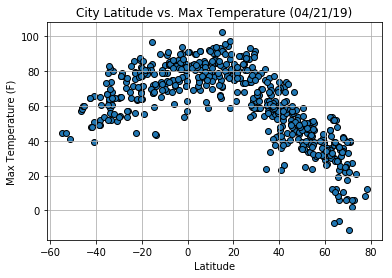

In [16]:
#create scatter plot
plt.scatter(df["Lat"], df["Max Temp"], edgecolor = "black")

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Max Temperature (04/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Max Temp.png")

#### Latitude vs. Humidity Plot

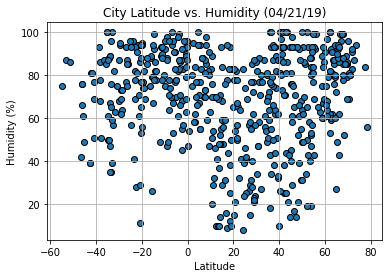

In [17]:
#create scatter plot
plt.scatter(df["Lat"], df["Humidity"], edgecolor = "black")

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Humidity (04/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Humidity.png")

#### Latitude vs. Cloudiness Plot

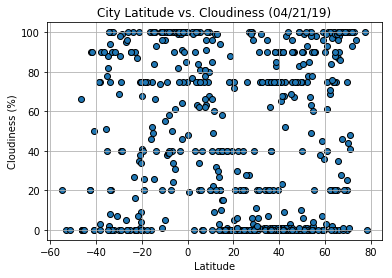

In [18]:
#create scatter plot
plt.scatter(df["Lat"], df["Cloudiness"], edgecolor = "black")

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (04/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Cloudiness.png")

#### Latitude vs. Wind Speed Plot

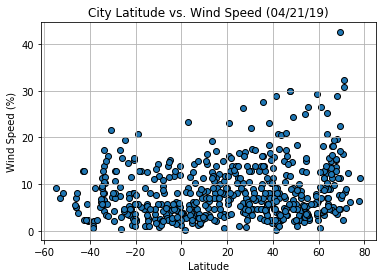

In [19]:
#create scatter plot
plt.scatter(df["Lat"], df["Wind Speed"], edgecolor = "black")

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (04/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

plt.savefig("Wind Speed.png")